In [1]:
from __future__ import print_function  
# for Python2 compatibility 

In [2]:
import numpy 
numpy.random.seed(1337)   # for experiment reproducibility 

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense 
from keras.optimizers import SGD 
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.
Matplotlib is building the font cache; this may take a moment.


In [4]:
num_classes = 10

batch_size = 128     
epochs = 20

In [5]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

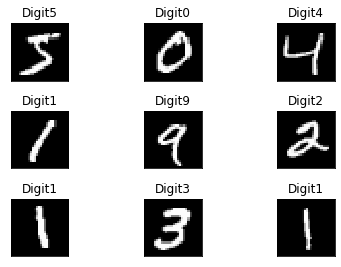

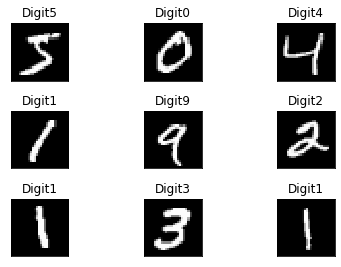

In [6]:
fig=plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(x_train[i], cmap='gray',interpolation='none')
    plt.title("Digit{}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
fig

In [8]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [9]:
x_train = x_train.reshape(60000, 784)  # 28x28 = 784
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 

x_train /= 255  # 0 - 255 ...  0-1 
x_test /= 255   # normalizing your data 


print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [10]:
print(x_train.shape)
print(y_train.shape)

(60000, 784)
(60000,)


In [11]:
y_train[0]

5

In [12]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [14]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

That's called a one-hot vector. 

In [15]:
model = Sequential()

In [16]:
model.add( Dense(512, activation='sigmoid', input_shape=(784,)  ) )
model.add( Dense(512, activation='sigmoid'  ) )
model.add( Dense(num_classes, activation='softmax'))

In [17]:
# What does the model look like? 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model 
model.compile(loss='categorical_crossentropy', optimizer=SGD(), 
              metrics=['accuracy'])

In [19]:
# let's perform the learning 
history = model.fit( x_train, y_train, 
           batch_size=batch_size,
           epochs=epochs, 
           verbose=1, 
           validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 66s 1ms/step - loss: 2.2733 - accuracy: 0.1880 - val_loss: 2.2331 - val_accuracy: 0.2969
Epoch 2/20
60000/60000 [==============================] - 53s 883us/step - loss: 2.1940 - accuracy: 0.3729 - val_loss: 2.1435 - val_accuracy: 0.3228
Epoch 3/20
60000/60000 [==============================] - 48s 804us/step - loss: 2.0889 - accuracy: 0.5107 - val_loss: 2.0159 - val_accuracy: 0.69100900 - ac
Epoch 4/20
60000/60000 [==============================] - 37s 610us/step - loss: 1.9346 - accuracy: 0.5951 - val_loss: 1.8304 - val_accuracy: 0.6437
Epoch 5/20
60000/60000 [==============================] - 27s 445us/step - loss: 1.7218 - accuracy: 0.6515 - val_loss: 1.5906 - val_accuracy: 0.6672
Epoch 6/20
60000/60000 [==============================] - 35s 581us/step - loss: 1.4798 - accuracy: 0.7003 - val_loss: 1.3500 - val_accuracy: 0.7207
Epoch 7/20
60000/60000 [=========================

In [20]:
# Let's evaluate the model 
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 4s 447us/step


See some great results here: http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#4d4e495354 

In [23]:
score[1]

0.8809000253677368